In [6]:
from typing import TypedDict

In [7]:
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float


In [9]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08  
    return state

In [10]:
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85.0  
    return state

In [13]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)

builder.add_edge(START, "calc_total_usd")
builder.add_edge("calc_total_usd", "convert_to_inr")
builder.add_edge("convert_to_inr", END)

graph = builder.compile()

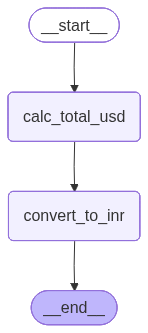

In [25]:
from IPython.display import display, Image

# Display the graph visualization
image_data = graph.get_graph().draw_mermaid_png()
display(Image(image_data))

In [26]:
graph.invoke({'amount_usd':1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}